In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data.shape

(1338, 7)

In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [6]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [7]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Experiment 1

In [3]:
from pycaret.regression import *

In [4]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [5]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4165.9668,33302032.0000,5770.7915,0.8011,0.4683,0.4153
1,4503.7373,43746484.0000,6614.1123,0.7456,0.5633,0.4217
2,3880.5542,31795154.0000,5638.7192,0.5974,0.7645,0.4396
3,3747.6450,26805306.0000,5177.3843,0.7762,0.5015,0.5175
4,4471.0425,43410540.0000,6588.6675,0.6771,0.5224,0.3767
5,4182.7559,36166336.0000,6013.8452,0.7674,0.7416,0.4320
6,4081.1018,39192588.0000,6260.3984,0.7333,0.6434,0.4241
7,4928.1533,46415028.0000,6812.8574,0.7448,0.5887,0.4137
8,4609.3140,40370352.0000,6353.7666,0.7392,0.5686,0.5111


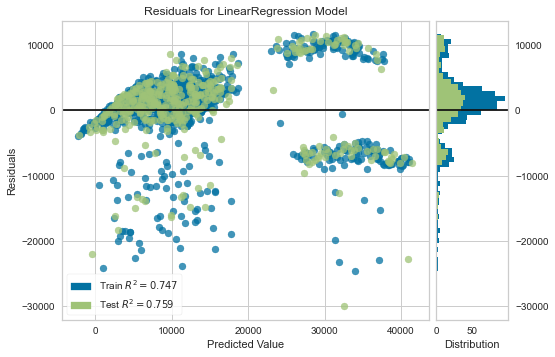

In [6]:
plot_model(lr)

# Experiment 2

In [10]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [11]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3151.7876,21998662.0000,4690.2729,0.8686,0.4146,0.3385
1,3390.8550,31509490.0000,5613.3315,0.8168,0.4849,0.3230
2,3015.1001,23597596.0000,4857.7358,0.7012,0.5378,0.3904
3,3108.7952,20558392.0000,4534.1362,0.8283,0.5102,0.4442
4,3403.8245,29510076.0000,5432.3179,0.7805,0.4748,0.3258
5,3212.0972,26113264.0000,5110.1138,0.8320,0.4180,0.3021
6,3043.5471,27678824.0000,5261.0669,0.8117,0.3992,0.3221
7,3543.8752,30849476.0000,5554.2305,0.8304,0.6633,0.3242
8,3265.9805,23340788.0000,4831.2305,0.8492,0.4190,0.3770


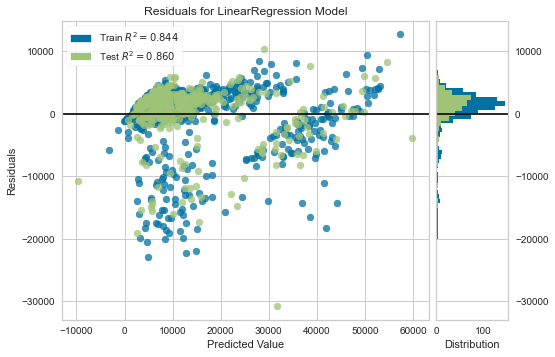

In [12]:
plot_model(lr)

In [15]:
save_model(lr, 'deployment_14092022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              n_jobs=-1, random_state=123, subclass='binary',
                              target='charges'

In [17]:
deployment_14092021 = load_model('deployment_14092022')

Transformation Pipeline and Model Successfully Loaded


In [18]:
deployment_14092021

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs',
                 DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                             n_jobs=-1, random_state=123, subclass='binary',
                             target='charges',
               

In [20]:
import requests
#url = 'https://pycaret-insurance.herokuapp.com/predict_api'

url = 'http://127.0.0.1:5000/predict_api'

pred = requests.post(url,json={'age':35, 'sex':'male', 'bmi':59, 'children':5, 'smoker':'no', 'region':'northwest'})
print(pred.json())

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))